

```
Name: Sudarsun S
RegNo: 20BCE1699
Machine Learning Embedded Lab
Topic: Hierarchical Clustering
```



1.	DOWNLOAD THAT DATASET
2.	PRINT THE SHAPE OF THE DATASET


In [59]:
import pandas as pd

df = pd.read_csv("cars_clus.csv")
print("Shape of the dataset:", df.shape)

Shape of the dataset: (159, 16)


3.	For these attributes- 'sales', 'resale', 'type', 'price', 'engine_s', 'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap','mpg', 'lnsales' convert these attributes to_numeric and remove all the strings in case it is present and replace them with NaN.

In [60]:
attributes_to_convert = ['sales', 'resale', 'price', 'engine_s', 'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap', 'mpg', 'lnsales']

for attr in attributes_to_convert:
    df[attr] = pd.to_numeric(df[attr], errors='coerce')

display(df)

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,Acura,Integra,16.919,16.360,0.000,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2.828,0.0
1,Acura,TL,39.384,19.875,0.000,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,3.673,0.0
2,Acura,CL,14.114,18.225,0.000,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,2.647,0.0
3,Acura,RL,8.588,29.725,0.000,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2.150,0.0
4,Audi,A4,20.397,22.255,0.000,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,3.015,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,Volvo,V70,17.531,NaN,0.000,28.80,2.4,168.0,104.9,69.3,186.2,3.259,17.9,25.0,2.864,0.0
155,Volvo,C70,3.493,NaN,0.000,45.50,2.3,236.0,104.9,71.5,185.7,3.601,18.5,23.0,1.251,0.0
156,Volvo,S80,18.969,NaN,0.000,36.00,2.9,201.0,109.9,72.1,189.8,3.600,21.1,24.0,2.943,0.0
157,NaN,newCar,NaN,NaN,$null$,21.50,1.5,76.0,106.3,67.9,175.0,2.932,11.9,46.0,NaN,1.0


4.	Drop the NaN coulmns

In [61]:
df.dropna(inplace=True)
display(df)

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,Acura,Integra,16.919,16.360,0.000,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2.828,0.0
1,Acura,TL,39.384,19.875,0.000,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,3.673,0.0
3,Acura,RL,8.588,29.725,0.000,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2.150,0.0
4,Audi,A4,20.397,22.255,0.000,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,3.015,0.0
5,Audi,A6,18.780,23.555,0.000,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,2.933,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,Volkswagen,Golf,9.761,11.425,0.000,14.90,2.0,115.0,98.9,68.3,163.3,2.767,14.5,26.0,2.278,0.0
146,Volkswagen,Jetta,83.721,13.240,0.000,16.70,2.0,115.0,98.9,68.3,172.3,2.853,14.5,26.0,4.427,0.0
147,Volkswagen,Passat,51.102,16.725,0.000,21.20,1.8,150.0,106.4,68.5,184.1,3.043,16.4,27.0,3.934,0.0
148,Volkswagen,Cabrio,9.569,16.575,0.000,19.99,2.0,115.0,97.4,66.7,160.4,3.079,13.7,26.0,2.259,0.0


5.	Reset the index

In [62]:
df.reset_index(drop=True, inplace=True)
display(df)

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,Acura,Integra,16.919,16.360,0.000,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2.828,0.0
1,Acura,TL,39.384,19.875,0.000,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,3.673,0.0
2,Acura,RL,8.588,29.725,0.000,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2.150,0.0
3,Audi,A4,20.397,22.255,0.000,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,3.015,0.0
4,Audi,A6,18.780,23.555,0.000,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,2.933,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,Volkswagen,Golf,9.761,11.425,0.000,14.90,2.0,115.0,98.9,68.3,163.3,2.767,14.5,26.0,2.278,0.0
113,Volkswagen,Jetta,83.721,13.240,0.000,16.70,2.0,115.0,98.9,68.3,172.3,2.853,14.5,26.0,4.427,0.0
114,Volkswagen,Passat,51.102,16.725,0.000,21.20,1.8,150.0,106.4,68.5,184.1,3.043,16.4,27.0,3.934,0.0
115,Volkswagen,Cabrio,9.569,16.575,0.000,19.99,2.0,115.0,97.4,66.7,160.4,3.079,13.7,26.0,2.259,0.0


6.	Print the shape of the dataset after cleaning

In [63]:
print("Shape of the cleaned dataset:", df.shape)

Shape of the cleaned dataset: (117, 16)


7.	Select the features -'engine_s',  'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap', 'mpg' into a df


In [64]:
selected_features = df[['engine_s', 'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap', 'mpg']]
display(selected_features)

,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg
0,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0
1,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0
2,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0
3,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0
4,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0
...,...,...,...,...,...,...,...,...
112,2.0,115.0,98.9,68.3,163.3,2.767,14.5,26.0
113,2.0,115.0,98.9,68.3,172.3,2.853,14.5,26.0
114,1.8,150.0,106.4,68.5,184.1,3.043,16.4,27.0
115,2.0,115.0,97.4,66.7,160.4,3.079,13.7,26.0


8.	Normalize the above features using min-max normalization technique

In [65]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalized_features = scaler.fit_transform(selected_features)
display(normalized_features)

array([[0.11428571, 0.21518987, 0.18655098, 0.28143713, 0.30625832,
        0.2310559 , 0.13364055, 0.43333333],
       [0.31428571, 0.43037975, 0.3362256 , 0.46107784, 0.5792277 ,
        0.50372671, 0.31797235, 0.33333333],
       [0.35714286, 0.39240506, 0.47722343, 0.52694611, 0.62849534,
        0.60714286, 0.35483871, 0.23333333],
       [0.11428571, 0.24050633, 0.21691974, 0.33532934, 0.38082557,
        0.34254658, 0.28110599, 0.4       ],
       [0.25714286, 0.36708861, 0.34924078, 0.80838323, 0.56724368,
        0.5173913 , 0.37788018, 0.23333333],
       [0.45714286, 0.64556962, 0.44251627, 0.68263473, 0.64980027,
        0.62329193, 0.61751152, 0.2       ],
       [0.25714286, 0.34936709, 0.31887202, 0.35329341, 0.35419441,
        0.40434783, 0.29032258, 0.3       ],
       [0.25714286, 0.34936709, 0.40780911, 0.49700599, 0.51398136,
        0.48975155, 0.37788018, 0.32666667],
       [0.3       , 0.30379747, 0.35574837, 0.60479042, 0.60186418,
        0.45745342, 0.331797

9.	Get the distance matrix of the above normalized features using scipy package

In [66]:
from scipy.spatial.distance import cdist
distance_matrix = cdist(normalized_features, normalized_features, 'euclidean')
print(distance_matrix)

[[0.         0.57777143 0.75455727 ... 0.28530295 0.24917241 0.18879995]
 [0.57777143 0.         0.22798938 ... 0.36087756 0.66346677 0.62201282]
 [0.75455727 0.22798938 0.         ... 0.51727787 0.81786095 0.77930119]
 ...
 [0.28530295 0.36087756 0.51727787 ... 0.         0.41797928 0.35720492]
 [0.24917241 0.66346677 0.81786095 ... 0.41797928 0.         0.15212198]
 [0.18879995 0.62201282 0.77930119 ... 0.35720492 0.15212198 0.        ]]


10.	Using hierarchy class in scipy.cluster package cluster the distance matrix got in step 9. Use all the 4 methods - complete, single, average, weighted and centroid linkage methods

11.	Print the cluster numbers for the clustered data points -with 3 clusters for all the above methods

12.	Plot the dendogram with right orientation-label the leaf with the manufacturer and model for all the linkage methods

Clusters using complete linkage method (3 clusters):
[3 3 3 3 3 3 1 3 3 3 3 3 3 3 1 1 3 1 3 3 3 3 3 1 3 2 3 3 3 3 3 3 3 3 3 3 1
 1 1 1 1 1 3 3 3 3 3 3 1 3 1 1 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 1 3 1
 1 1 3 3 3 3 3 3 3 3 3 3 1 3 3 3 3 1 1 3 3 3 1 3 3 3 3 3 3 3 3 3 3 1 3 1 3
 3 3 3 3 3 3 3 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 3 3 3 3 3 3 3
 3 3 3 3 3 2 3]


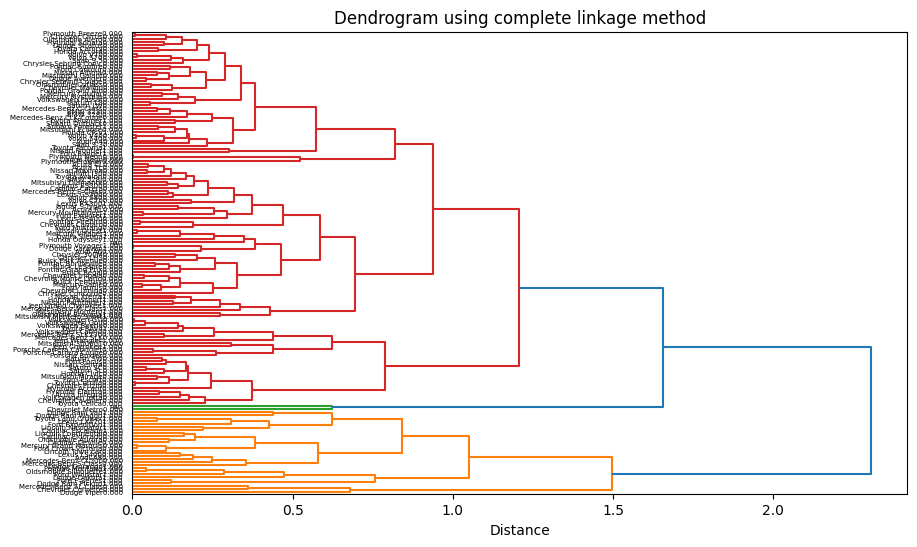

Clusters using single linkage method (3 clusters):
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1 2
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1]


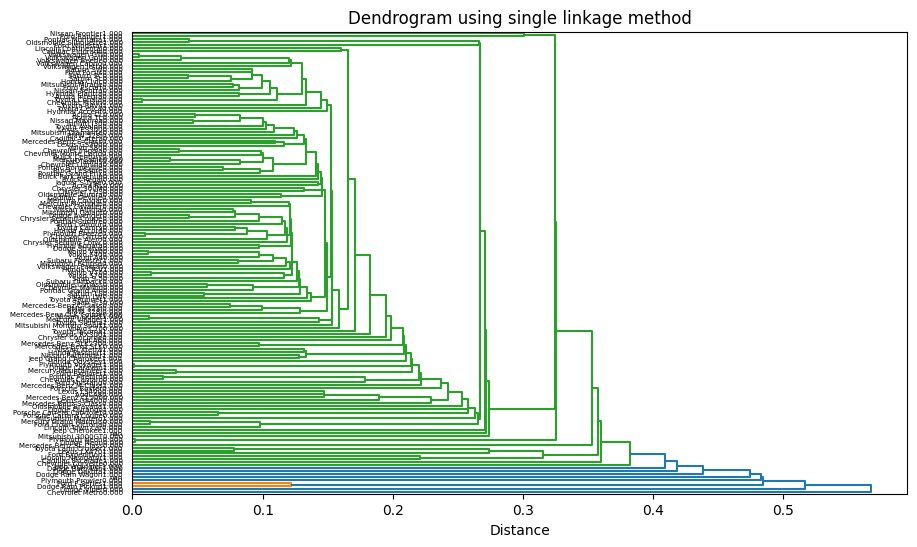

Clusters using average linkage method (3 clusters):
[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 3 3 3 3 3 3 3 1 3 3 3 3 3 3 3 3 3 3 3
 2 2 2 3 3 3 3 3 3 3 3 3 3 3 2 3 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 3 3
 3 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 3 3 3 3 3 3 3
 3 3 3 3 3 1 3]


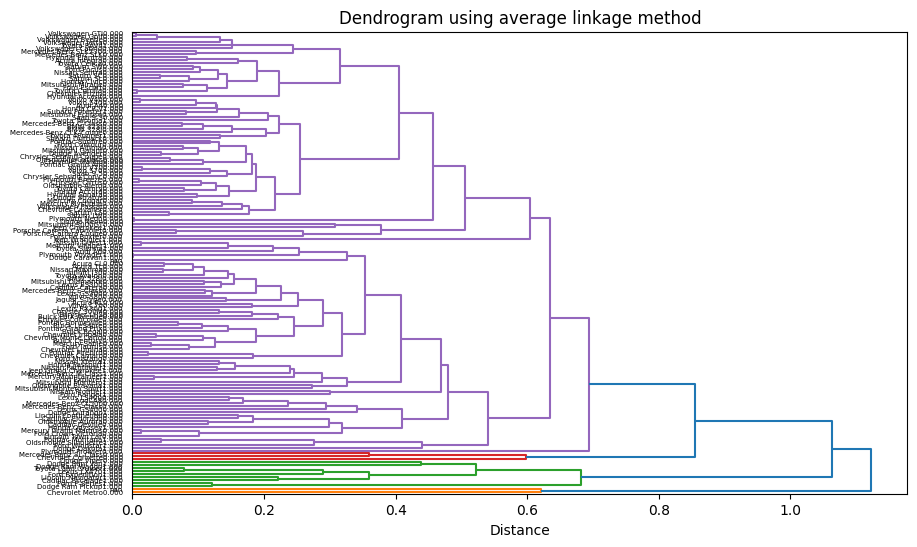

Clusters using weighted linkage method (3 clusters):
[1 3 3 3 1 3 3 1 1 3 3 3 3 3 3 3 3 3 1 1 3 3 3 2 1 1 3 1 1 3 1 3 3 1 1 1 2
 3 3 3 3 3 3 1 3 1 3 1 3 3 3 3 3 3 1 1 1 3 3 1 1 1 3 3 1 1 3 3 3 3 3 3 3 3
 3 3 1 1 1 3 1 3 1 1 1 3 3 3 3 1 3 3 2 1 1 1 3 3 1 1 3 3 3 3 3 1 1 3 3 3 1
 1 3 1 1 1 3 3 3 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 3 1 1 3 1 1 1 1 1 1 1
 1 1 1 3 3 1 3]


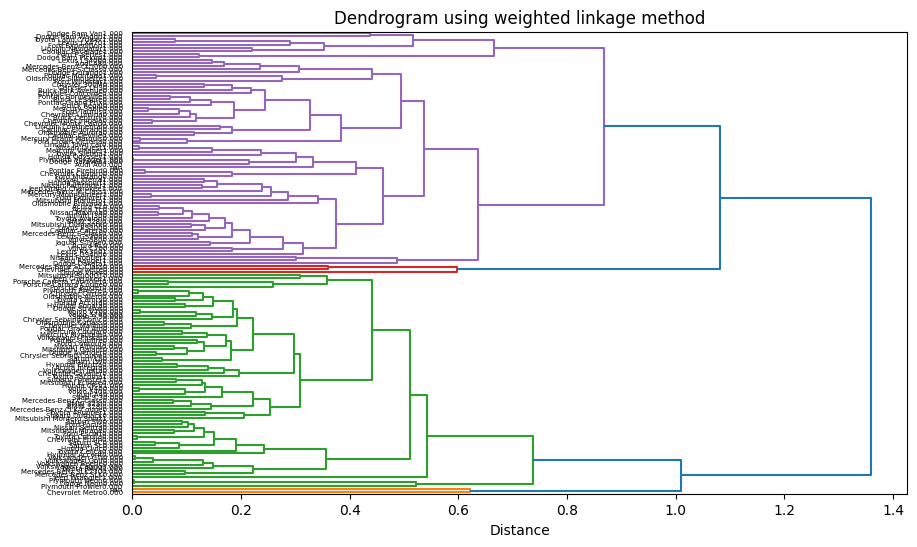

Clusters using centroid linkage method (3 clusters):
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 3
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 1 2]


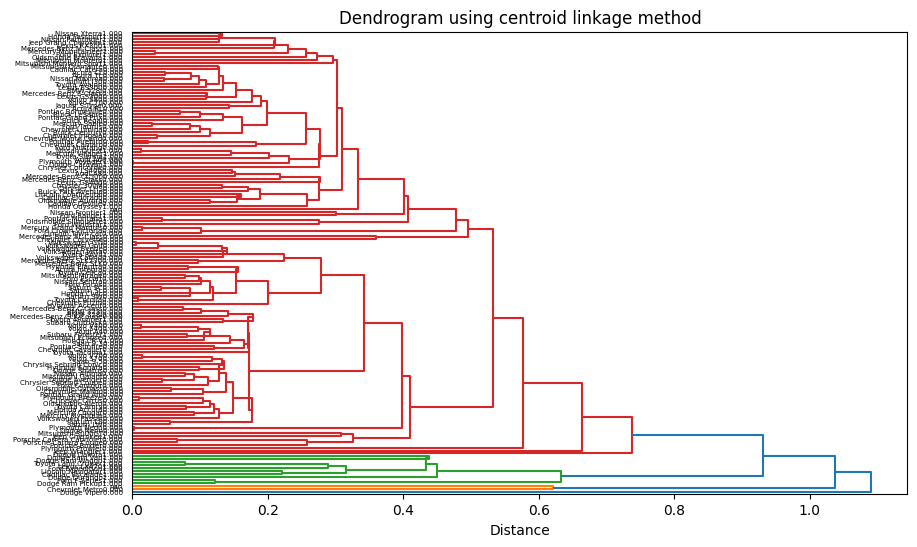

In [67]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import pandas as pd

car_data = pd.read_csv('cars_clus.csv')
numeric_columns = ['engine_s', 'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap', 'mpg']
for column in numeric_columns:
    car_data[column] = pd.to_numeric(car_data[column], errors='coerce')

car_data.dropna(subset=numeric_columns, inplace=True)
selected_features = car_data[numeric_columns]
normalized_features = (selected_features - selected_features.min()) / (selected_features.max() - selected_features.min())


linkage_methods = ['complete', 'single', 'average', 'weighted', 'centroid']
cluster_count = 3

for method in linkage_methods:

    linkage_matrix = linkage(normalized_features, method)

    clusters = fcluster(linkage_matrix, cluster_count, criterion='maxclust')
    print(f"Clusters using {method} linkage method (3 clusters):")
    print(clusters)

    plt.figure(figsize=(10, 6))
    labels = car_data['manufact'] + " " + car_data['model'] + car_data['type'].astype(str)
    dendrogram(linkage_matrix, orientation='right', labels=labels.values)
    plt.title(f"Dendrogram using {method} linkage method")
    plt.xlabel('Distance')
    plt.show()


13.	Use agglomerative clustering to cluster the above dataset into 6 clusters ( using ward, complete  and average linkage methods)
14.	Print the labels in each case


In [68]:
from sklearn.cluster import AgglomerativeClustering
agglomerative_methods = ['ward', 'complete', 'average']

for method in agglomerative_methods:
    clustering = AgglomerativeClustering(n_clusters=6, linkage=method)
    labels = clustering.fit_predict(normalized_features)
    print(f"Labels using {method} linkage method (6 clusters):")
    print(labels)

Labels using ward linkage method (6 clusters):
[0 1 1 1 0 1 4 0 0 1 1 1 1 1 4 4 1 2 0 0 1 1 1 5 3 3 1 0 0 1 0 1 1 0 0 0 5
 2 2 2 4 1 1 3 1 0 1 3 4 1 4 2 1 2 3 0 0 1 1 3 0 0 1 1 0 0 1 1 1 1 4 2 1 4
 4 2 3 0 0 1 0 1 0 0 0 1 4 1 1 0 1 4 5 0 0 0 4 1 3 0 1 1 1 1 1 0 0 4 1 4 0
 0 1 0 0 0 1 1 1 4 0 0 0 0 0 3 3 3 0 0 0 0 3 0 1 3 0 1 0 0 2 0 0 0 0 0 0 0
 0 0 0 1 1 3 1]
Labels using complete linkage method (6 clusters):
[4 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 1 4 0 0 0 0 3 4 5 0 0 0 0 0 0 0 0 0 0 3
 2 1 1 2 1 0 4 0 0 0 4 1 0 2 1 0 2 4 0 0 0 0 4 4 0 0 0 4 4 0 0 0 0 1 1 0 1
 1 1 4 0 0 0 4 0 0 0 0 0 1 0 0 0 0 1 3 4 4 0 1 0 4 0 0 0 0 0 0 0 0 1 0 2 0
 0 0 0 0 0 0 0 0 2 4 4 4 0 0 4 4 4 0 0 0 0 4 0 0 4 0 0 4 0 1 4 4 0 4 4 4 0
 0 0 0 0 0 5 0]
Labels using average linkage method (6 clusters):
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 3 0 1 0 0 0 0 0 0 0 0 0 0 3
 5 2 2 0 0 0 0 0 0 0 0 0 0 0 2 0 5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0
 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

15.	Append the label of complete linkage to the original data frame and print the top 5 records


In [69]:
car_data['CompleteLinkageLabel'] = labels

print("Top 5 records with Complete Linkage Label:")
print(car_data.head(5))

Top 5 records with Complete Linkage Label:
  manufact    model   sales  resale   type   price  engine_s  horsepow  \
0    Acura  Integra  16.919  16.360  0.000  21.500       1.8     140.0   
1    Acura       TL  39.384  19.875  0.000  28.400       3.2     225.0   
2    Acura       CL  14.114  18.225  0.000  $null$       3.2     225.0   
3    Acura       RL   8.588  29.725  0.000  42.000       3.5     210.0   
4     Audi       A4  20.397  22.255  0.000  23.990       1.8     150.0   

   wheelbas  width  length  curb_wgt  fuel_cap   mpg lnsales  partition  \
0     101.2   67.3   172.4     2.639      13.2  28.0   2.828        0.0   
1     108.1   70.3   192.9     3.517      17.2  25.0   3.673        0.0   
2     106.9   70.6   192.0     3.470      17.2  26.0   2.647        0.0   
3     114.6   71.4   196.6     3.850      18.0  22.0   2.150        0.0   
4     102.6   68.2   178.0     2.998      16.4  27.0   3.015        0.0   

   CompleteLinkageLabel  
0                     0  
1        

16.	Save the data in a csv file


In [70]:
car_data.to_csv('clustered_data.csv', index=False)

17.	Identify the number of types of cars under each cluster

In [71]:
cluster_counts = car_data.groupby('CompleteLinkageLabel')['type'].nunique()

print("Number of types of cars under each cluster:")
print(cluster_counts)

Number of types of cars under each cluster:
CompleteLinkageLabel
0    3
1    2
2    1
3    1
4    1
5    1
Name: type, dtype: int64


18.	Generate the characteristic of each cluster – find the mean of the  - horsepow','engine_s','mpg','price’ attribtues for each type under each cluster

In [72]:
numeric_columns = ['engine_s', 'horsepow', 'mpg', 'price']

for column in numeric_columns:
    car_data[column] = pd.to_numeric(car_data[column], errors='coerce')

car_data.dropna(subset=numeric_columns, inplace=True)

clustering = AgglomerativeClustering(n_clusters=6, linkage='complete')
labels = clustering.fit_predict(car_data[numeric_columns])

car_data['CompleteLinkageLabel'] = labels

cluster_characteristics = car_data.groupby(['CompleteLinkageLabel', 'type'])[['horsepow', 'engine_s', 'mpg', 'price']].mean()

cluster_characteristics = cluster_characteristics.reset_index()

display(cluster_characteristics)


,CompleteLinkageLabel,type,horsepow,engine_s,mpg,price
0,0,0.000,295.750000,4.400000,21.416667,59.203750
1,0,1.000,300.000000,5.400000,15.000000,42.660000
2,1,0.000,212.210526,3.268421,23.678947,32.292500
3,1,1.000,212.200000,4.060000,18.800000,31.708050
4,2,$null$,76.000000,1.500000,46.000000,21.500000
5,2,0.000,55.000000,1.000000,45.000000,9.235000
6,3,0.000,113.578947,1.905263,29.526316,14.213842
7,3,1.000,121.500000,2.375000,21.500000,15.094500
8,4,$null$,167.000000,3.500000,26.000000,34.200000
9,4,0.000,155.097561,2.451220,25.782927,19.879390


19.	Identify the clusters having majority of vehicles and



In [73]:
cluster_counts = car_data['CompleteLinkageLabel'].value_counts()
majority_cluster = cluster_counts.idxmax()
majority_cluster_count = cluster_counts.max()
print(f"Cluster with the majority of vehicles: {majority_cluster}")
print(f"Count of vehicles in the majority cluster: {majority_cluster_count}")

Cluster with the majority of vehicles: 1
Count of vehicles in the majority cluster: 58


20.	Also identify which cluster has
  1.	mpg and hp is good but less price average
  2.	high horse power but less hp  and
  3.	low mpg high hp but high price

In [74]:
good_mpg_hp_less_price = car_data[(car_data['mpg'] > 25) & (car_data['horsepow'] > 200) & (car_data['price'] < 20000)]
high_horsepower_less_hp = car_data[(car_data['horsepow'] > 300) & (car_data['price'] < 20000)]
low_mpg_high_hp_high_price = car_data[(car_data['mpg'] < 15) & (car_data['horsepow'] > 300) & (car_data['price'] > 30000)]

print("Clusters based on specific criteria:")
print("1. Good mpg and hp, but less price average:", good_mpg_hp_less_price['CompleteLinkageLabel'].unique())
print("2. High horsepower but less hp:", high_horsepower_less_hp['CompleteLinkageLabel'].unique())
print("3. Low mpg, high hp, and high price:", low_mpg_high_hp_high_price['CompleteLinkageLabel'].unique())

Clusters based on specific criteria:
1. Good mpg and hp, but less price average: [1]
2. High horsepower but less hp: [0 5]
3. Low mpg, high hp, and high price: []
